<a href="https://colab.research.google.com/github/ahmadSoliman94/Machine-Learning/blob/main/DL/Modern%20Computer%20Vision%20with%20Pytorch/PyTorch_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
from torch.optim import SGD

print(torch.__version__)

1.12.0+cu113


## PyTorch tensors:
- scaler can be represented as a zero-dimensional tensor.
- scaler can be represented as a one-dimensional tensor.
- scaler can be represented as a tow-dimensional tensor.

### Initalize a tensor

In [2]:
x = torch.tensor([[1,2]])
y = torch.tensor([[1],[2]])

### object's shape and data type

In [3]:
print(x.shape)

torch.Size([1, 2])


In [4]:
print(y.shape)

torch.Size([2, 1])


In [5]:
print(x.dtype)

torch.int64


### Generate a tensor object with 3 rows and 4 columns filled with zeros

In [6]:
torch.zeros((3,4))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

### Generate a tensor object with 3 rows and 4 columns filled with ones

In [7]:
torch.ones((3,4))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

### Generate three rows and four columns of vlaues between 0 and 10 (including just the low value but mot including the heigh value) 0 -> 9

In [8]:
torch.randint(low=0, high=10, size=(3,4))

tensor([[1, 1, 1, 6],
        [9, 3, 9, 4],
        [2, 2, 0, 2]])

### Generate random numbers between 0 and 1 with three row and four columns

In [9]:
torch.rand(3,4)

tensor([[0.5025, 0.1353, 0.7368, 0.6711],
        [0.2332, 0.0206, 0.3233, 0.7025],
        [0.2262, 0.7369, 0.3551, 0.2666]])

### convert a NumPy array into a Torch tensor

In [10]:
x = np.array([[10,20,30],[2,3,4]])
y = torch.tensor(x)
print(type(x),type(y))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


In [11]:
np_torch = torch.from_numpy(x)

In [12]:
print(type(x),type(np_torch))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


## Operations on tensors

### Multiplication of all the elemnts

In [13]:
x = torch.tensor([[1,2,3,4],
                  [5,6,7,8]])

print(x * 10)
print(x.shape)

tensor([[10, 20, 30, 40],
        [50, 60, 70, 80]])
torch.Size([2, 4])


### Adding of all the elemnts

In [14]:
x = torch.tensor([[1,2,4,5],
                  [6,7,8,9]])
y = x.add(10)
print(y)

tensor([[11, 12, 14, 15],
        [16, 17, 18, 19]])


In [15]:
print( x + 10)

tensor([[11, 12, 14, 15],
        [16, 17, 18, 19]])


### Reshaping a tensor

In [16]:
y = torch.tensor([2,3,1,0])
print(y.shape)
y = y.view(4,1)
print(y.shape)

torch.Size([4])
torch.Size([4, 1])


### Adding a dimension to the matrix using unsqueeze

In [17]:
x = torch.randn(10,10)
print(x.shape)
z1 = x.unsqueeze(0)
print(z1.shape)

# The same can be achieved using [None] indexing
# Adding None will auto create a fake dim at the
# specified axis

x = torch.randn(10,10)
z2, z3, z4 = x[None], x[:,None], x[:,:,None]
print(z2.shape, z3.shape, z4.shape)

torch.Size([10, 10])
torch.Size([1, 10, 10])
torch.Size([1, 10, 10]) torch.Size([10, 1, 10]) torch.Size([10, 10, 1])


### Matrix multiplication of two different tensors

In [18]:
x = torch.tensor([[1,2,3,4], [5,6,7,8]])
print(torch.matmul(x, y))

tensor([[11],
        [35]])


In [19]:
print(x@y)

tensor([[11],
        [35]])


### concatenation of tensors

In [20]:
x = torch.randn(10,10,10)
z = torch.cat([x,x], axis=0) # np.concatenate()
print('Cat axis 0:', x.shape, z.shape)

z = torch.cat([x,x], axis=1) # np.concatenate()
print('Cat axis 1:', x.shape, z.shape)

o = torch.cat([x,x], axis=2) # np.concatenate()
print('Cat axis 2:', x.shape, z.shape, o.shape)

Cat axis 0: torch.Size([10, 10, 10]) torch.Size([20, 10, 10])
Cat axis 1: torch.Size([10, 10, 10]) torch.Size([10, 20, 10])
Cat axis 2: torch.Size([10, 10, 10]) torch.Size([10, 20, 10]) torch.Size([10, 10, 20])


### Extraction of the maximum value in tensor

In [21]:
x = torch.arange(25).reshape(5,5)
print(x)
print('Max:', x.shape, x.max()) 

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])
Max: torch.Size([5, 5]) tensor(24)


In [22]:
x.max(dim=0) # row

torch.return_types.max(values=tensor([20, 21, 22, 23, 24]), indices=tensor([4, 4, 4, 4, 4]))

In [23]:
m, argm = x.max(dim=1) # columns
print('Max in axis 1:\n', m, argm) 

Max in axis 1:
 tensor([ 4,  9, 14, 19, 24]) tensor([4, 4, 4, 4, 4])


### Permute the dimensions of a tensor object
(swap dimensions)

In [24]:
x = torch.randn(10,20,30)
z = x.permute(1,0,2) # x.prmute(0,2,1) -> torch.Size(10,30,20)
print('Permute dimensions:', x.shape, z.shape)

Permute dimensions: torch.Size([10, 20, 30]) torch.Size([20, 10, 30])


## Auto gradients of tensor objects

### 1. Define a tensor object
 requires_grad parameter specifies the gradient is to be calculated for the tensor object.

In [25]:
x = torch.tensor([[2., -1.], [1., 1.]], requires_grad=True) 
print(x)

tensor([[ 2., -1.],
        [ 1.,  1.]], requires_grad=True)


### 2.  Define the way to calculate the output, wich in this specific case is the sum of the squares of all input: 

$\mathbf{output} = \sum_{i=1}^4 x_i^2$.

In [26]:
out = x.pow(2).sum()

In [27]:
out

tensor(7., grad_fn=<SumBackward0>)

### 3. The gradient of a value can be calculated

In [28]:
out.backward()

In [29]:
x.grad

tensor([[ 4., -2.],
        [ 2.,  2.]])

####Computing gradients for the same case that was present in Chain_rule.ipynb notebook in previous chapter.

In [30]:
x = np.array([[1,1]])
y = np.array([[0]])
x, y = [torch.tensor(i).float() for i in [x,y]]
print(x,y)

tensor([[1., 1.]]) tensor([[0.]])


In [31]:
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]

W = [torch.tensor(i, requires_grad=True) for i in W]
print(W)

[tensor([[-0.0053, -0.5820, -0.2723],
        [ 0.3793, -0.5204,  0.1896]], requires_grad=True), tensor([-0.0140,  0.5607, -0.0628], requires_grad=True), tensor([[ 0.1528],
        [-0.1745],
        [-0.1135]], requires_grad=True), tensor([-0.5516], requires_grad=True)]


In [32]:
def feed_forward(inputs, outputs, weights):
    pre_hidden = torch.matmul(inputs,weights[0])+ weights[1]
    hidden = 1/(1+torch.exp(-pre_hidden))
    out = torch.matmul(hidden, weights[2]) + weights[3]
    mean_squared_error = torch.mean(torch.square(out - outputs))
    return mean_squared_error

In [33]:
loss = feed_forward(x, y, W)
loss

tensor(0.3346, grad_fn=<MeanBackward0>)

In [34]:
loss.backward()

In [35]:
print([w.grad for w in W])

[tensor([[-0.0428,  0.0469,  0.0327],
        [-0.0428,  0.0469,  0.0327]]), tensor([-0.0428,  0.0469,  0.0327]), tensor([[-0.6814],
        [-0.4255],
        [-0.5364]]), tensor([-1.1568])]


In [36]:
updated_W = [w-w.grad for w in W]
updated_W

[tensor([[ 0.0375, -0.6289, -0.3050],
         [ 0.4221, -0.5673,  0.1569]], grad_fn=<SubBackward0>),
 tensor([ 0.0288,  0.5138, -0.0955], grad_fn=<SubBackward0>),
 tensor([[0.8342],
         [0.2510],
         [0.4229]], grad_fn=<SubBackward0>),
 tensor([0.6052], grad_fn=<SubBackward0>)]

## Advantages of PyTorch's tensors over NumPy's ndarrays#

Numpy vs Torch computation speed comparison

### 1. Generate two different torch objects

In [37]:
x = torch.rand(1,6400)
y = torch.rand(6400,5000)

### 2. Define the device 

In [38]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
assert device == 'cuda', "This exercise assumes the notebook is on a GPU machine"

In [39]:
device

'cuda'

### 3. Storing information in a device

In [40]:
x,y = x.to(device=device),  y.to(device=device)

In [41]:
x

tensor([[0.2727, 0.5383, 0.9698,  ..., 0.9984, 0.0401, 0.4789]],
       device='cuda:0')

### 4. Perform matrix multiplication of Torch objects and time it to compare the speed  between Torch and Numpy

In [42]:
%timeit z=(x@y)

The slowest run took 251598.41 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 11.7 µs per loop


In [43]:
x, y = x.cpu(), y.cpu()
%timeit z=(x@y)

100 loops, best of 5: 8.85 ms per loop


In [44]:
import numpy as np
x = np.random.random((1, 6400))
y = np.random.random((6400, 5000))
%timeit z = np.matmul(x,y)

100 loops, best of 5: 19.1 ms per loop


## Building a neural network using PyTorch

### 1. Define the input and output values:

In [45]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

### 2. Convert the input lists into tensor objects:

In [46]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

### 3. register the input and out put data points to the decive

In [47]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

### 4. Define the neural network architecture:

In [48]:
class MyNeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_to_hidden_layer = nn.Linear(2,8)
    self.hidden_layer_activation = nn.ReLU()
    self.hidden_to_output_layer = nn.Linear(8,1)

  def forward(self,x):
    x = self.input_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_to_output_layer(x)
    return x

### 5. access the inital weights of each of the components: 

In [49]:
mynet = MyNeuralNet().to(device)

- Note: they are used only for illustration of how to obtain parameters of a given layer.

In [50]:
print(f'input to hidden layer weigths: \n {mynet.input_to_hidden_layer.weight}' ) # (2,8)

input to hidden layer weigths: 
 Parameter containing:
tensor([[ 0.3896, -0.1668],
        [-0.1321,  0.1493],
        [ 0.4026,  0.6723],
        [ 0.1598,  0.4438],
        [ 0.6527,  0.0993],
        [ 0.6780, -0.1942],
        [-0.3065,  0.7014],
        [ 0.1150,  0.2840]], device='cuda:0', requires_grad=True)


In [51]:
print(f'hidden layer to output layer weigths: \n {mynet.hidden_to_output_layer.weight}' ) # (8,1)

hidden layer to output layer weigths: 
 Parameter containing:
tensor([[ 0.1808,  0.0736, -0.0854, -0.3344,  0.0035,  0.1143,  0.3365,  0.1519]],
       device='cuda:0', requires_grad=True)


In [52]:
mynet.parameters

<bound method Module.parameters of MyNeuralNet(
  (input_to_hidden_layer): Linear(in_features=2, out_features=8, bias=True)
  (hidden_layer_activation): ReLU()
  (hidden_to_output_layer): Linear(in_features=8, out_features=1, bias=True)
)>

In [53]:
for par in mynet.parameters():
  print(par)

Parameter containing:
tensor([[ 0.3896, -0.1668],
        [-0.1321,  0.1493],
        [ 0.4026,  0.6723],
        [ 0.1598,  0.4438],
        [ 0.6527,  0.0993],
        [ 0.6780, -0.1942],
        [-0.3065,  0.7014],
        [ 0.1150,  0.2840]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.6513, -0.5171,  0.3980, -0.6950,  0.1055,  0.0632, -0.3871, -0.4835],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.1808,  0.0736, -0.0854, -0.3344,  0.0035,  0.1143,  0.3365,  0.1519]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0.2177], device='cuda:0', requires_grad=True)


### 6. Define the loss function:
CrossEntropyLoss -> for multinomial classification.
BCELoss -> binary cross-entropy loss for binary classification.

In [54]:
loss_func = nn.MSELoss()

**The loss value of a neural network can be calculated by passing the input values through the neuralnet object and then calculating MSELoss for the given input.**

In [55]:
_Y = mynet(X) # _y -> prediction
print(f'- Prediction values: \n {_Y} \n')
print(f'- Actual values: \n {Y} \n')
loss_value = loss_func(_Y,Y)
print(f'- Loss value: \n {loss_value}')

- Prediction values: 
 tensor([[0.2293],
        [0.1449],
        [0.1139],
        [0.1099]], device='cuda:0', grad_fn=<AddmmBackward0>) 

- Actual values: 
 tensor([[ 3.],
        [ 7.],
        [11.],
        [15.]], device='cuda:0') 

- Loss value: 
 98.72303771972656


### 7.  Import the SGD method:

In [56]:
opt = SGD(mynet.parameters(), lr = 0.001)

###8. Perform all the steps to be done in an epoch together:

*NOTE: Problem:  Can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.*

*solution: 
Converting: type(loss_value): tensor -> numpy: tensor.cpu().detach.numpy()*

In [57]:
loss_history = []
for _ in range(50):
    opt.zero_grad() # flush the previous epoch's gradients. 
    loss_value = loss_func(mynet(X),Y) # compute loss.
    loss_value.backward() # perform back-propagation.
    loss_value = loss_value.cpu().detach().numpy() # Convert cuda:0 device type tensor to numpy to plotting.
    opt.step() # update the weights according to the gradients computed.
    loss_history.append(loss_value)

  *After Backpropagation:*

In [58]:
_Y = mynet(X) # _y -> prediction
print(f'- Prediction values: \n {_Y} \n')
print(f'- Actual values: \n {Y} \n')
loss_value = loss_func(_Y,Y)
print(f'- Loss value: \n {loss_value}')

- Prediction values: 
 tensor([[ 3.2249],
        [ 7.0776],
        [10.9983],
        [14.9191]], device='cuda:0', grad_fn=<AddmmBackward0>) 

- Actual values: 
 tensor([[ 3.],
        [ 7.],
        [11.],
        [15.]], device='cuda:0') 

- Loss value: 
 0.015792448073625565


### *9. Plotting the vartion in loss over increasing epochs:*

Text(0, 0.5, 'loss value')

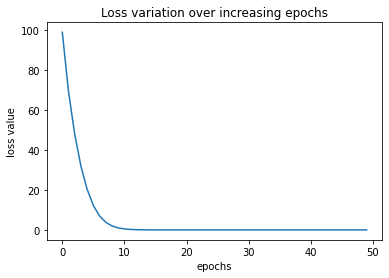

In [59]:
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

## Implementing costom loss function

In [60]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]
import torch
X = torch.tensor(x).float()
Y = torch.tensor(y).float()
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device) 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
class MyDataset(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x).float()
        self.y = torch.tensor(y).float()
    def __len__(self):
        return len(self.x)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]
ds = MyDataset(X, Y)
dl = DataLoader(ds, batch_size=2, shuffle=True)
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x
mynet = MyNeuralNet().to(device)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kernelapp as app


In [61]:
def my_mean_squared_error(_y, y):
    loss = (_y-y)**2
    loss = loss.mean()
    return loss

In [62]:
loss_func = nn.MSELoss()
loss_value = loss_func(mynet(X),Y)
print(loss_value)

tensor(92.0884, device='cuda:0', grad_fn=<MseLossBackward0>)


In [63]:
my_mean_squared_error(mynet(X),Y)

tensor(92.0884, device='cuda:0', grad_fn=<MeanBackward0>)